In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_excel("/content/drive/Othercomputers/My Laptop/untairhack/data/Merged_clean.xlsx")

In [ ]:
df["primary_call_reason_categorical"].unique()

array(['Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage Plus', 'Checkout', 'Voluntary Change', 'Post Flight',
       'Check In', 'Other Topics', 'Communications', 'Schedule Change',
       'Products and Services', 'Digital Support', 'Disability',
       'Unaccompanied Minor', 'Baggage', 'Traveler Updates', 'ETC'],
      dtype=object)

{'whiskers': [<matplotlib.lines.Line2D at 0x7815f8795f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7815f87964d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7815f8795e10>],
 'medians': [<matplotlib.lines.Line2D at 0x7815f8796a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7815f8796cb0>],
 'means': []}

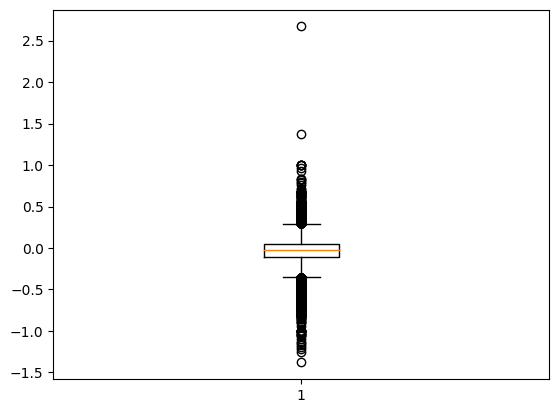

In [ ]:
plt.boxplot(df.average_sentiment)

{'whiskers': [<matplotlib.lines.Line2D at 0x7815f5601450>,
 'caps': [<matplotlib.lines.Line2D at 0x7815f5601840>,
 'boxes': [<matplotlib.lines.Line2D at 0x7815f56011b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7815f5601d80>],
 'fliers': [],
 'means': []}

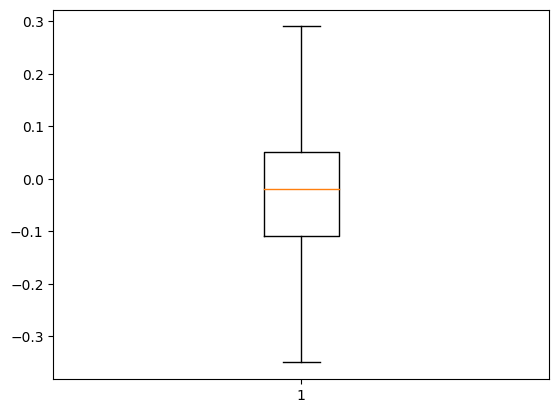

In [ ]:
plt.boxplot(df.average_sentiment,showfliers=False)

# `average_sentiment`
- range is btw -0.3 to +0.3
- extreme +ve is 2.5
  - it was for Voluntary change(primary_call_reason)
- extreme -ve is -1.6
  - this transcript is a conversation between a customer and a United Airlines customer service agent. The customer wants to change their flight from New York to LA because of an important meeting on the same day as the flight. The agent checks for available alternatives but finds that most flights are full. The customer gets frustrated because the options offered (a flight much later or with layovers) are not convenient. Eventually, the agent offers a $200 travel credit as compensation since the ticket is non-refundable. The customer reluctantly accepts the credit, but they're still upset with the situation and the service.

In [ ]:
average_duration = df.groupby(['agent_id', 'primary_call_reason_categorical'], as_index=False)['call_duration'].mean()
average_duration.rename(columns={'call_duration': 'average_call_duration'}, inplace=True)

# Pivot the DataFrame
pivot_table = average_duration.pivot(index='agent_id', columns='primary_call_reason_categorical', values='average_call_duration')

# Fill NaN values with 0 or another placeholder (optional)
pivot_table.fillna(0, inplace=True)

# Reset index to make agent_id a column again
pivot_table.reset_index(inplace=True)

In [ ]:
pivot_table

primary_call_reason_categorical,agent_id,Baggage,Booking,Check In,Checkout,Communications,Digital Support,Disability,ETC,IRROPS,...,Other Topics,Post Flight,Products and Services,Schedule Change,Seating,Traveler Updates,Unaccompanied Minor,Upgrade,Voluntary Cancel,Voluntary Change
0,102574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.00,115.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000
1,103651,9.833333,12.000000,7.000000,14.833333,12.421053,5.250000,3.666667,17.125000,13.316667,...,9.00,19.785714,12.250000,5.500000,7.548387,2.00,6.0,8.095238,14.600000,13.325000
2,106000,5.857143,0.000000,4.400000,26.000000,16.400000,5.500000,0.000000,0.000000,12.500000,...,3.00,13.700000,15.000000,0.000000,11.000000,3.75,0.0,13.000000,5.666667,9.166667
3,107876,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,18.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.0,15.000000,0.000000,25.000000
4,112609,0.000000,37.500000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,6.000000,...,0.00,16.000000,0.000000,0.000000,9.500000,0.00,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,981776,3.384615,5.941176,8.384615,18.500000,17.823529,2.571429,3.000000,11.666667,14.228070,...,5.00,15.769231,11.125000,12.400000,7.250000,13.00,0.0,5.500000,15.250000,14.350000
379,981779,5.625000,13.600000,9.222222,17.600000,15.400000,4.000000,3.000000,16.333333,15.452381,...,2.00,9.250000,9.111111,4.000000,13.086957,7.00,5.0,5.000000,10.333333,10.314286
380,982131,3.625000,4.200000,3.800000,16.000000,12.888889,3.333333,0.000000,20.000000,14.402985,...,3.75,9.500000,13.625000,4.000000,7.409091,4.00,0.0,7.000000,10.333333,11.791667
381,992521,0.000000,6.000000,0.000000,55.000000,7.500000,4.000000,2.000000,13.000000,21.416667,...,0.00,13.250000,16.250000,0.000000,4.000000,16.00,0.0,15.500000,0.000000,16.833333


In [ ]:
melted = pivot_table.melt(id_vars=['agent_id'], var_name='call_reason', value_name='average_call_duration')

# Filter out rows where average_call_duration is less than or equal to zero
melted = melted[melted['average_call_duration'] > 0]

# Find the agent with the minimum average call duration for each reason
min_agents = melted.loc[melted.groupby('call_reason')['average_call_duration'].idxmin()]

# Reset index for clarity (optional)
min_agents.reset_index(drop=True, inplace=True)

# Display the result
print(min_agents)

    agent_id            call_reason  average_call_duration
0     214289                Baggage               0.500000
1     461615                Booking               1.000000
2     292344               Check In               1.000000
3     294450               Checkout               1.000000
4     229129         Communications               2.000000
5     139291        Digital Support               1.000000
6     265196             Disability               1.000000
7     233571                    ETC               1.000000
8     764643                 IRROPS               3.333333
9     992521           Mileage Plus               1.000000
10    153182           Other Topics               1.000000
11    603165            Post Flight               1.000000
12    616850  Products and Services               1.000000
13    136010        Schedule Change               1.000000
14    234327                Seating               1.000000
15    640212       Traveler Updates               0.6666

# observation
- for agent_id=214289 : least duration
  -
- for duration=1
  - we noticed it is quite big transcript not possible to complete in 1 minute
    - possible due to error in obervation(still possible)
- range of avg lowest call duration can be form 0 to 4(approx)

In [ ]:
melted = pivot_table.melt(id_vars=['agent_id'], var_name='call_reason', value_name='average_call_duration')

# Filter out rows where average_call_duration is less than or equal to zero
melted = melted[melted['average_call_duration'] > 0]

# Find the agent with the maximum average call duration for each reason
max_agents = melted.loc[melted.groupby('call_reason')['average_call_duration'].idxmax()]

# Reset index for clarity (optional)
max_agents.reset_index(drop=True, inplace=True)

# Display the result
print(max_agents)


    agent_id            call_reason  average_call_duration
0     234327                Baggage                   29.0
1     255256                Booking                   90.0
2     121149               Check In                  107.0
3     917294               Checkout                   71.0
4     750345         Communications                   44.0
5     937733        Digital Support                   34.0
6     760378             Disability                   29.5
7     136065                    ETC                  105.0
8     545730                 IRROPS                   35.0
9     140146           Mileage Plus                   63.0
10    552900           Other Topics                   26.0
11    102574            Post Flight                  115.0
12    289288  Products and Services                   75.0
13    537146        Schedule Change                   46.0
14    294450                Seating                   23.0
15    757377       Traveler Updates                   38

# compare the 2 agenst for a particular reason
  - most average time agent
  - least average time agent
  - see their ways of working & improve to enhance the operational efficiency

*(reasses using real_avg_call_duration below)

Is table se kuch key insights nikaali ja sakti hain, jo company ke call handling efficiency aur customer support process ko improve karne me madad kar sakti hain. Kuch insights ye ho sakti hain:

### 1. **High Duration Call Reasons:**
   - **Longest Call Reasons:**
     - "Post Flight" calls have the longest average duration (115 mins), indicating that these types of calls require more time to resolve. It suggests that these calls might involve more complex issues.
     - Other longer call reasons include "Check In" (107 mins), "ETC" (105 mins), and "Booking" (90 mins).
     - These might indicate complex queries or issues where resolution takes a longer time.

### 2. **Quick Call Resolutions:**
   - **Shortest Call Reasons:**
     - "Seating" issues have the shortest call duration (23 mins), indicating they are likely straightforward and easy to resolve.
     - "Other Topics" (26 mins) and "Baggage" (29 mins) also have relatively short call durations, which might indicate these issues are either simple to solve or may have automated solutions.

### 3. **Categorization of Call Types:**
   - **Simple vs. Complex Queries:**
     - Call reasons such as "Seating", "Other Topics", and "Baggage" seem simple to resolve, while "Post Flight", "Check In", and "ETC" likely involve more complicated discussions or problems that require deeper investigation.

### 4. **Potential Areas for Process Improvement:**
   - Focus on reducing call durations for high-duration reasons like "Post Flight" and "Check In". This can be done by improving resources such as FAQs, training staff, or implementing better digital support solutions.
   - For the longer call reasons, exploring whether additional training, automation, or self-service options can be offered to customers.

### 5. **Digital Support Efficiency:**
   - **"Digital Support" calls are resolved relatively quickly (34 mins)**, showing that digital support teams might already be efficient. These processes could be expanded or improved to handle more complex queries.

In summary, longer duration calls typically indicate more complex issues, while shorter calls suggest simpler, more straightforward concerns. By focusing on improving resolution times for the longer calls and maintaining or enhancing processes for quicker ones, the company can likely enhance overall efficiency and customer satisfaction.

In [ ]:
df.groupby('primary_call_reason_categorical',as_index=False).agg(
    real_avg_call_duration=pd.NamedAgg(column='call_duration',aggfunc='mean')
)

,primary_call_reason_categorical,real_avg_call_duration
0,Baggage,5.560734
1,Booking,7.128934
2,Check In,9.568803
3,Checkout,16.947564
4,Communications,13.778646
5,Digital Support,6.204898
6,Disability,4.868486
7,ETC,16.048319
8,IRROPS,13.085268
9,Mileage Plus,16.592890


In [ ]:
avg_duration_df = df.groupby('primary_call_reason_categorical', as_index=False).agg(
    real_avg_call_duration=pd.NamedAgg(column='call_duration', aggfunc='mean')
).sort_values('real_avg_call_duration')

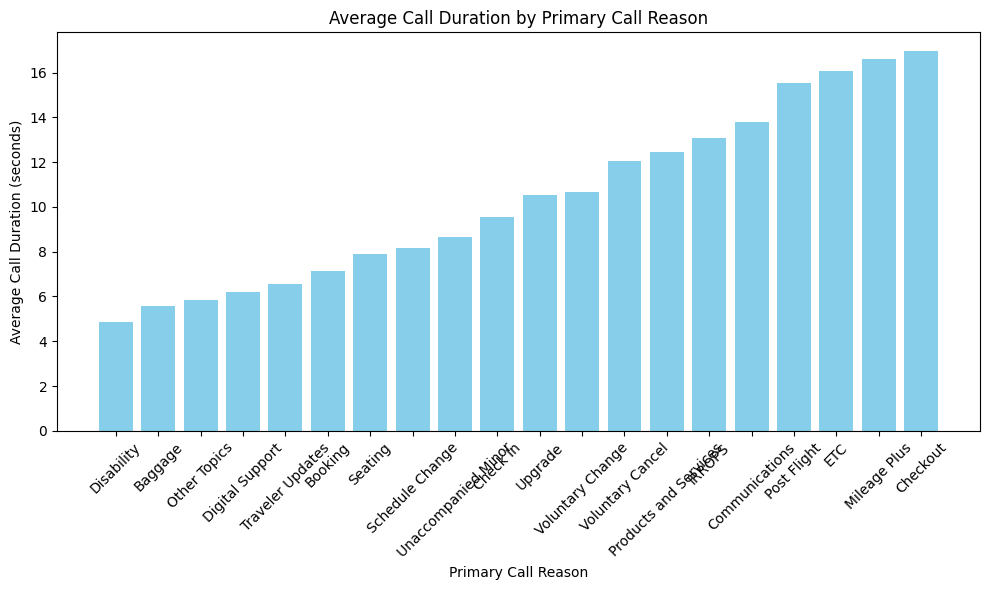

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(avg_duration_df['primary_call_reason_categorical'], avg_duration_df['real_avg_call_duration'], color='skyblue')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Call Duration (seconds)')
plt.title('Average Call Duration by Primary Call Reason')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# observation
- checkout is taking the most time(avg_time)
- disability is taking the least time

# observation
- for

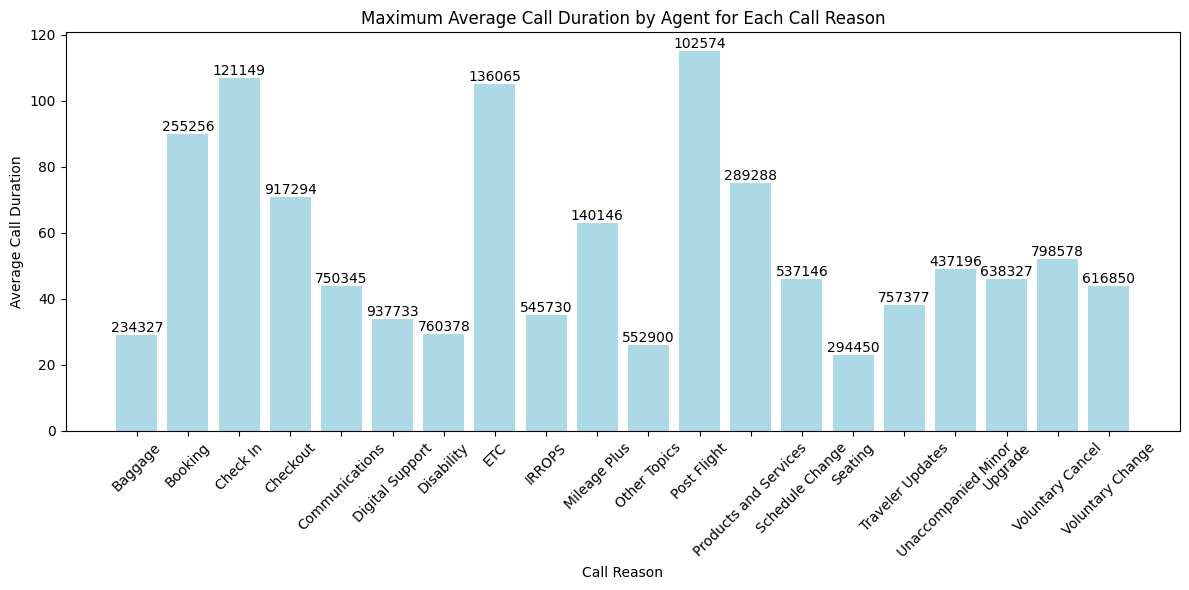

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot for maximum average call duration
plt.bar(max_agents['call_reason'], max_agents['average_call_duration'], color='lightblue')

# Adding agent names as annotations above each bar
for i, row in max_agents.iterrows():
    plt.text(i, row['average_call_duration'], row['agent_id'], ha='center', va='bottom')

# Set title and labels
plt.title("Maximum Average Call Duration by Agent for Each Call Reason")
plt.xlabel("Call Reason")
plt.ylabel("Average Call Duration")
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

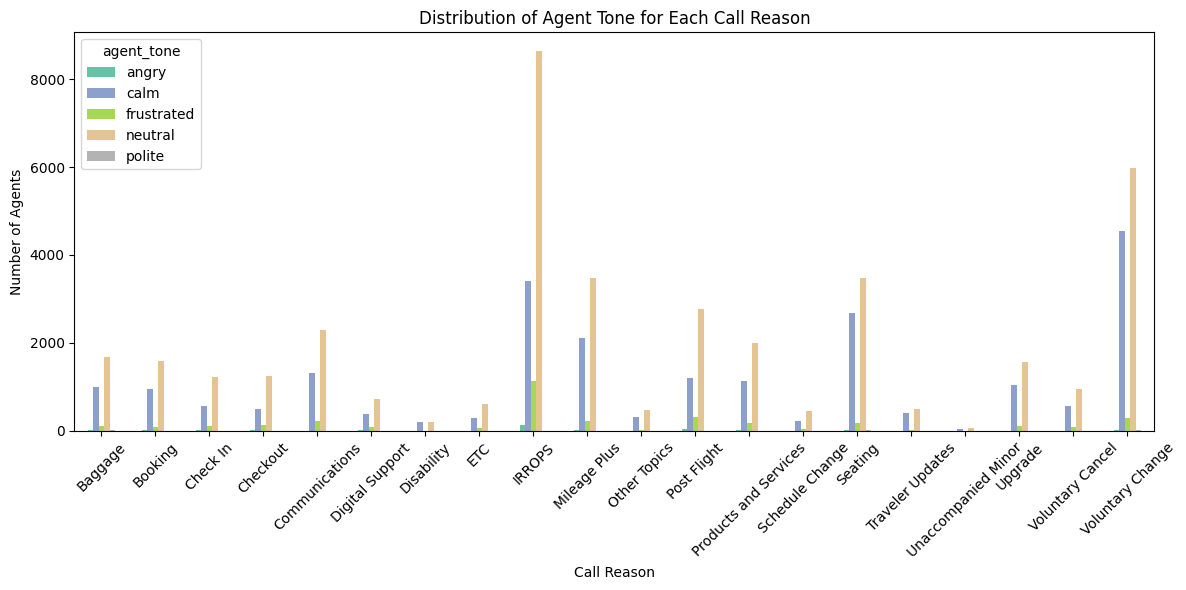

In [ ]:
tone_distribution = df.groupby(['primary_call_reason_categorical', 'agent_tone'])['agent_id'].count().unstack().fillna(0)

# Set figure size
plt.figure(figsize=(12, 6))

# Plotting the grouped bar plot
tone_distribution.plot(kind='bar', figsize=(12, 6), colormap='Set2')

# Set title and labels
plt.title("Distribution of Agent Tone for Each Call Reason")
plt.xlabel("Call Reason")
plt.ylabel("Number of Agents")
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

# observation
- overall the proportion of different tone out of 5 tones is same for all the primary_call_reason
  - mostly we notice the neutral & calm tones frustrated then angry then polite in last polite
    - we recommend to organize events at the office to promote to behave politely more offen

<Figure size 1200x600 with 0 Axes>

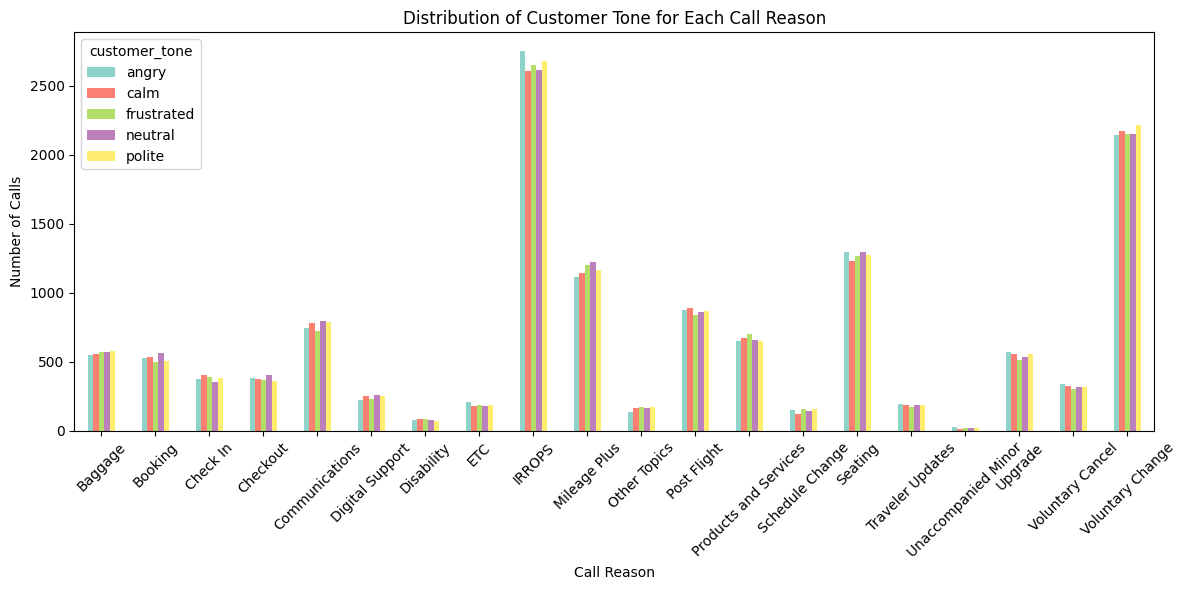

In [ ]:
customer_tone_distribution = df.groupby(['primary_call_reason_categorical', 'customer_tone'])['call_id'].count().unstack().fillna(0)

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting the grouped bar plot for customer tone distribution
customer_tone_distribution.plot(kind='bar', figsize=(12, 6), colormap='Set3')

# Set title and labels
plt.title("Distribution of Customer Tone for Each Call Reason")
plt.xlabel("Call Reason")
plt.ylabel("Number of Calls")
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

# observation
- we notice the frequency of tones for different tone of customer is same & follows accross all the primary_call_reason

<Figure size 1400x700 with 0 Axes>

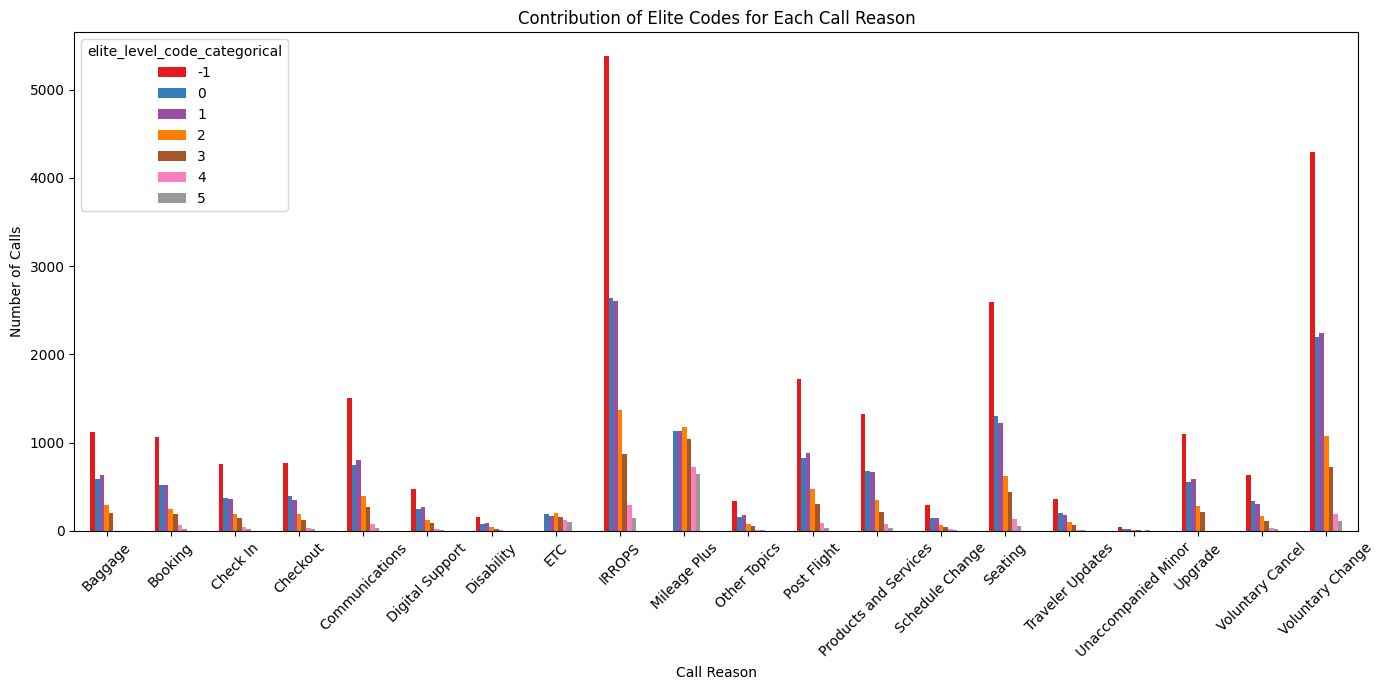

In [ ]:
elite_code_distribution = df.groupby(['primary_call_reason_categorical', 'elite_level_code_categorical'])['call_id'].count().unstack().fillna(0)

# Set the figure size
plt.figure(figsize=(14, 7))

# Plotting the grouped bar plot for elite code distribution
elite_code_distribution.plot(kind='bar', figsize=(14, 7), colormap='Set1')

# Set title and labels
plt.title("Contribution of Elite Codes for Each Call Reason")
plt.xlabel("Call Reason")
plt.ylabel("Number of Calls")
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

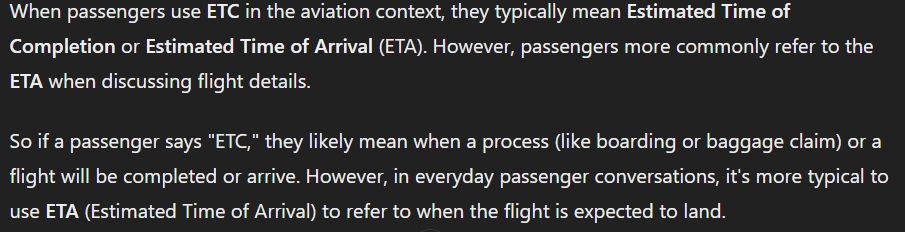

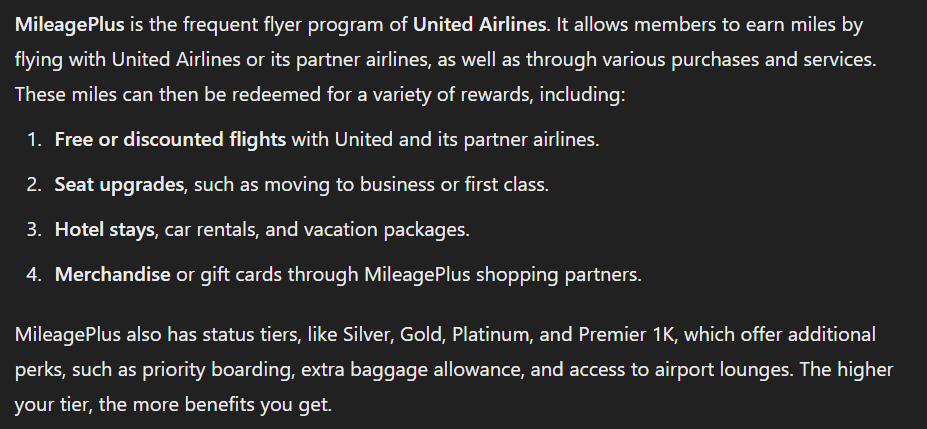

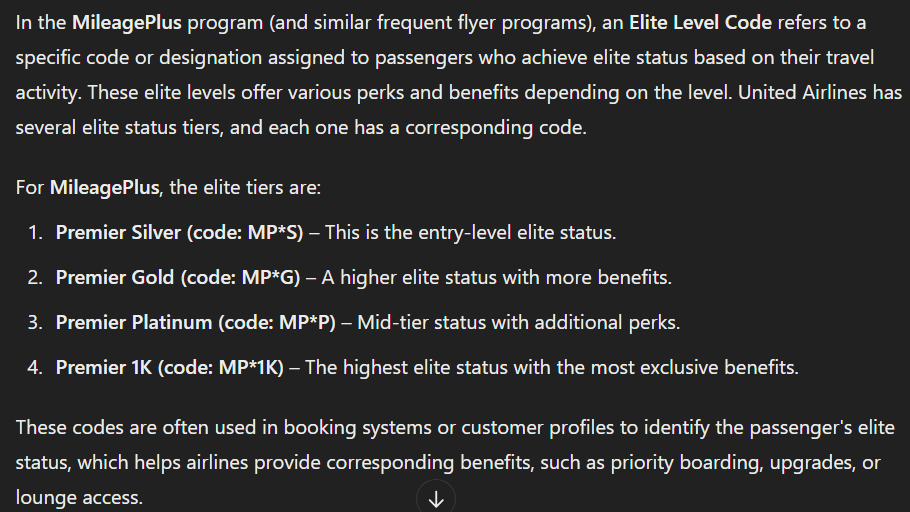

# obervation
- the ratio proportion frequency of customers(wrt different level) is same across all the reasons except
  - Travel updates : ratio of different level customer is almost same
    - this suggests that(all level customers are calling for these reasons with same frequency as elite customers) : these reasons are more like a general queuery
  - we don't get often calls for travel updates(as company is 24h busy in givng updates to customers already)

  - in ETC & mileage plus
    - we don't have or less number of calls from non-elite customers(level=-1)
      - why?
        - ETC e.g. baggage claim in case of loss claims are more from the customers who are elite(travel more often with united airlines) & less cases for non-elite(level -1) customers who travels not that often with the united airlines
        - mileage plus status is not for level -1
    
    - ratio of other different level customer is almost same
    - that's becasue lost cases can be for anyone level 0 to 5(probabiltiy of loosing item is not influenced by elite_level of the customer)
  
  - in mileage plus, we are having comparably has significant proportion of calls from elite level 5 customer as compared to other primary_call_reason proportion of different calls

- there is more level -1 which is obvious(most are subscription less), & least is level 5(less prime members)

In [ ]:
average_sentiment_by_reason = df.groupby('primary_call_reason_categorical')['average_sentiment'].mean().reset_index()

# Rename the columns for clarity
average_sentiment_by_reason.columns = ['call_reason', 'average_sentiment_score']

# Display the result
print(average_sentiment_by_reason)

              call_reason  average_sentiment_score
0                 Baggage                -0.019619
1                 Booking                -0.013318
2                Check In                -0.042925
3                Checkout                -0.068957
4          Communications                -0.036383
5         Digital Support                -0.041959
6              Disability                 0.035757
7                     ETC                -0.049275
8                  IRROPS                -0.073959
9            Mileage Plus                -0.027370
10           Other Topics                -0.003839
11            Post Flight                -0.063767
12  Products and Services                -0.034379
13        Schedule Change                -0.033844
14                Seating                -0.002767
15       Traveler Updates                 0.006692
16    Unaccompanied Minor                -0.013846
17                Upgrade                -0.015990
18       Voluntary Cancel      

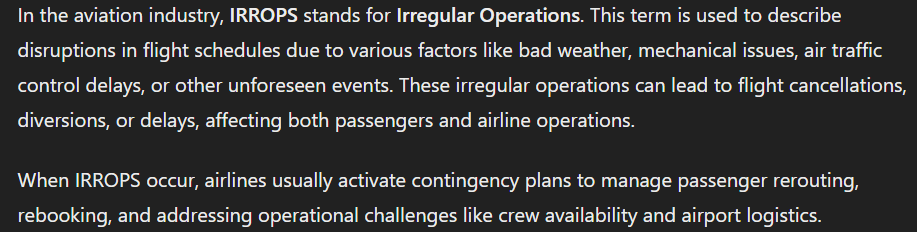

# observation
- customers are not satisfied(low/-ve rating/sentiment score) with the calls response for most of the reasons except
  - disability & travel(+ve sentimetn score)

- least satisfie for IRROPS(-0.073959) because no one likes flight delays


In [ ]:
average_silence_by_reason = df.groupby('primary_call_reason_categorical')['silence_percent_average'].mean().reset_index()

# Rename the columns for clarity
average_silence_by_reason.columns = ['call_reason', 'average_silence_percentage']

# Display the result
print(average_silence_by_reason)

              call_reason  average_silence_percentage
0                 Baggage                    0.250508
1                 Booking                    0.260948
2                Check In                    0.262736
3                Checkout                    0.292309
4          Communications                    0.303578
5         Digital Support                    0.285298
6              Disability                    0.248635
7                     ETC                    0.287563
8                  IRROPS                    0.309404
9            Mileage Plus                    0.275038
10           Other Topics                    0.272726
11            Post Flight                    0.297804
12  Products and Services                    0.276759
13        Schedule Change                    0.267223
14                Seating                    0.264613
15       Traveler Updates                    0.284717
16    Unaccompanied Minor                    0.242500
17                Upgrade   

In [ ]:
average_silence_by_reason.describe()

,average_silence_percentage
count,20.000000
mean,0.276537
std,0.018165
min,0.242500
25%,0.264144
50%,0.276891
75%,0.288072
max,0.309404


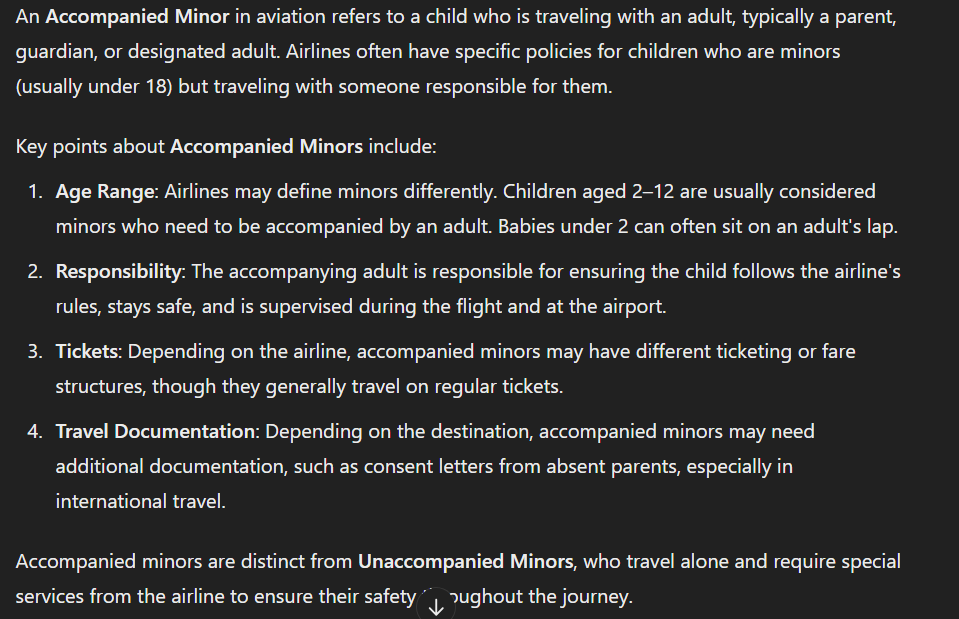

- max silence is for IRROPS(because agents take time to confirm the reason behind the inconsistencies/delays in the operation by asking to the right person or the person in stake)
- least silence is for Unaccompanied minor where the topic is what is ticketing policy for the minor(straight forward question & answer)

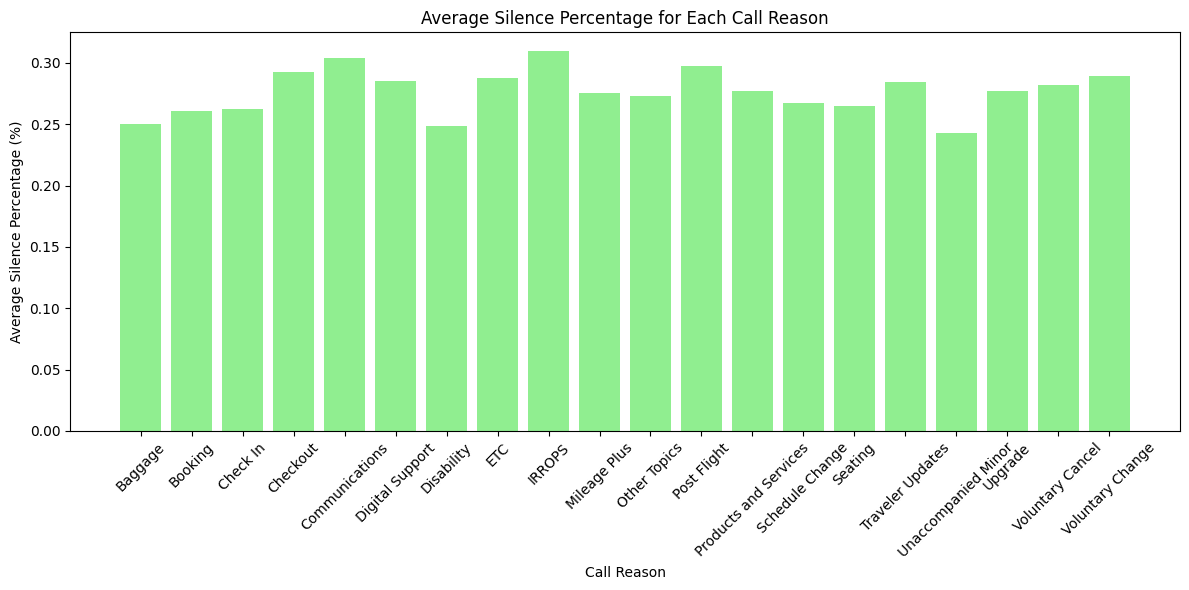

In [ ]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot for average silence percentage by call reason
plt.bar(average_silence_by_reason['call_reason'], average_silence_by_reason['average_silence_percentage'], color='lightgreen')

# Set title and labels
plt.title("Average Silence Percentage for Each Call Reason")
plt.xlabel("Call Reason")
plt.ylabel("Average Silence Percentage (%)")
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


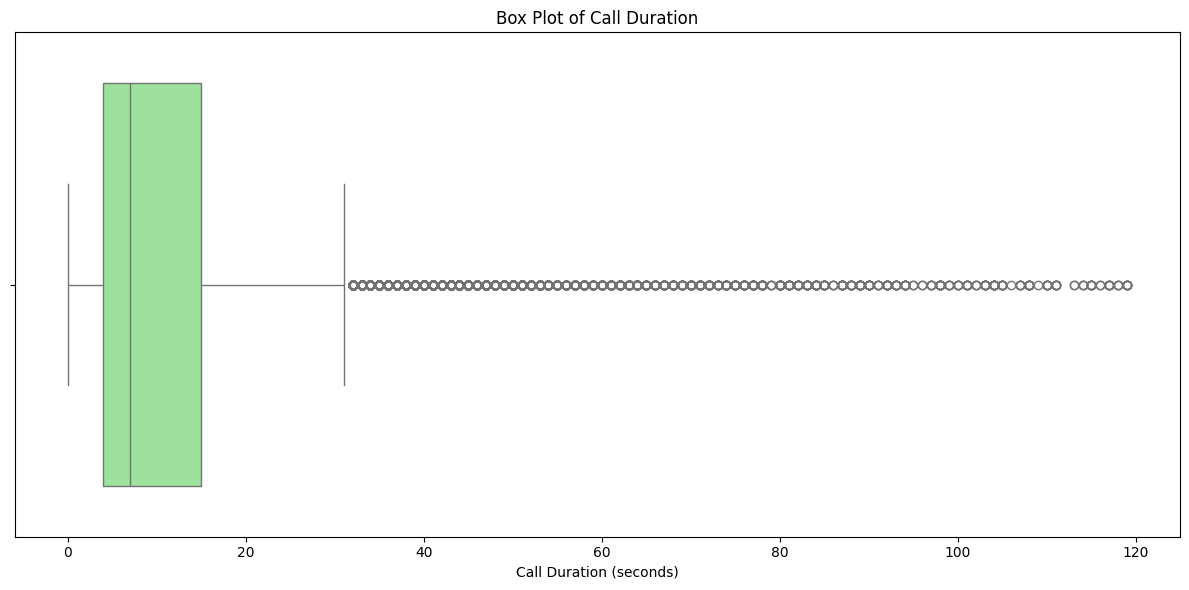

In [ ]:
plt.figure(figsize=(12, 6))

# Create a box plot for call duration
sns.boxplot(x=df['call_duration'], color='lightgreen')

# Set title and labels
plt.title("Box Plot of Call Duration")
plt.xlabel("Call Duration (seconds)")

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
df.call_duration.describe()

,call_duration
count,66653.000000
mean,11.619612
std,12.905448
min,0.000000
25%,4.000000
50%,7.000000
75%,15.000000
max,119.000000


In [ ]:
df.call_duration[df.call_duration>15].size/df.shape[0]

0.232847733785426

- most of the calls are btw (4-15) minutes
- there are outliers on the right side of 15 minutes also they are significant in number(23% of the data)
  - we need to identify if there are some particular primary_call_reason where we're observing outliers the most(call_duration by reason)
    - see below boxplots
      - Mileage Plus, Checkout, ETC & Post Flight are contributing the most for thos outliers(because avg & distribution of call_reason for those reasons are higher than 15(75th %ile of the overall call_duration)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Voluntary Cancel'),
  Text(1, 0, 'Booking'),
  Text(2, 0, 'IRROPS'),
  Text(3, 0, 'Upgrade'),
  Text(4, 0, 'Seating'),
  Text(5, 0, 'Mileage Plus'),
  Text(6, 0, 'Checkout'),
  Text(7, 0, 'Voluntary Change'),
  Text(8, 0, 'Post Flight'),
  Text(9, 0, 'Check In'),
  Text(10, 0, 'Other Topics'),
  Text(11, 0, 'Communications'),
  Text(12, 0, 'Schedule Change'),
  Text(13, 0, 'Products and Services'),
  Text(14, 0, 'Digital Support'),
  Text(15, 0, 'Disability'),
  Text(16, 0, 'Unaccompanied Minor'),
  Text(17, 0, 'Baggage'),
  Text(18, 0, 'Traveler Updates'),
  Text(19, 0, 'ETC')])

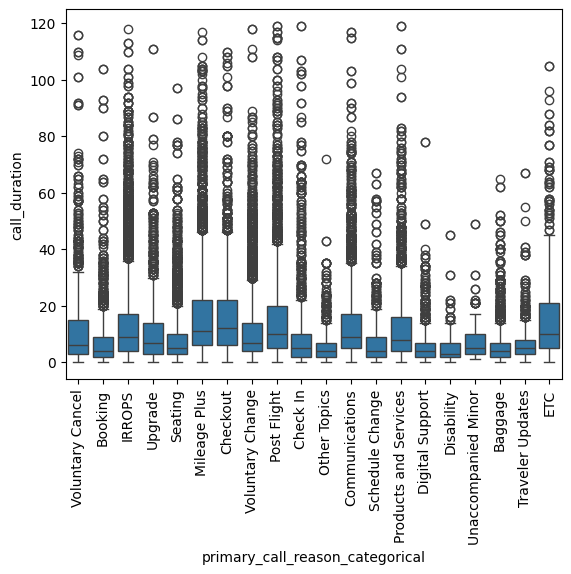

In [ ]:
sns.boxplot(
    data=df,
    x='primary_call_reason_categorical',
    y='call_duration'
)
plt.xticks(rotation=90)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Voluntary Cancel'),
  Text(1, 0, 'Booking'),
  Text(2, 0, 'IRROPS'),
  Text(3, 0, 'Upgrade'),
  Text(4, 0, 'Seating'),
  Text(5, 0, 'Mileage Plus'),
  Text(6, 0, 'Checkout'),
  Text(7, 0, 'Voluntary Change'),
  Text(8, 0, 'Post Flight'),
  Text(9, 0, 'Check In'),
  Text(10, 0, 'Other Topics'),
  Text(11, 0, 'Communications'),
  Text(12, 0, 'Schedule Change'),
  Text(13, 0, 'Products and Services'),
  Text(14, 0, 'Digital Support'),
  Text(15, 0, 'Disability'),
  Text(16, 0, 'Unaccompanied Minor'),
  Text(17, 0, 'Baggage'),
  Text(18, 0, 'Traveler Updates'),
  Text(19, 0, 'ETC')])

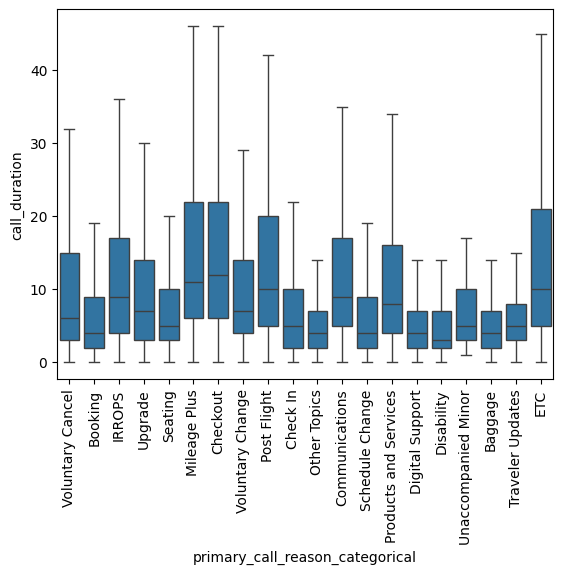

In [ ]:
sns.boxplot(
    data=df,
    x='primary_call_reason_categorical',
    y='call_duration',
    showfliers=False
)
plt.xticks(rotation=90)

In [ ]:
df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,assigning_time,call_duration,customer_name,elite_level_code,elite_level_code_categorical,primary_call_reason,primary_call_reason_categorical,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,7,31,Matthew Foster,4,4,Voluntary Cancel,Voluntary Cancel,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,3,12,Tammy Walters,-1,-1,Booking,Booking,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,8,19,Jeffery Dixon,-1,-1,IRROPS,IRROPS,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,5,7,David Wilkins,2,2,Upgrade,Upgrade,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,10,9,Elizabeth Daniels,0,0,Seating,Seating,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,6,10,Kevin Warner,2,2,Mileage Plus,Mileage Plus,neutral,frustrated,-0.19,0.51
66649,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,9,28,Dennis Singleton DDS,-1,-1,Post Flight,Post Flight,calm,calm,0.05,0.34
66650,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,3,8,Paul Mitchell,1,1,Upgrade,Upgrade,calm,frustrated,0.03,0.22
66651,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,6,6,Kaylee Lang,-1,-1,Upgrade,Upgrade,calm,polite,0.05,0.42


In [ ]:
df['hour'] = df['call_start_datetime'].dt.hour

# Group by the hour and count the number of calls in each hour
hourly_call_count = df.groupby('hour').size().reset_index(name='number_of_calls')

# Display the result
print(hourly_call_count)

    hour  number_of_calls
0      0             1064
1      1             1044
2      2              965
3      3              998
4      4              985
5      5             1029
6      6             1008
7      7             1477
8      8             4817
9      9             4929
10    10             4812
11    11             4873
12    12             4916
13    13             4780
14    14             4844
15    15             4826
16    16             4875
17    17             4883
18    18             4334
19    19             1030
20    20             1052
21    21             1029
22    22             1044
23    23             1039


<ipython-input-28-3037311ac7d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='number_of_calls', data=hourly_call_count, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

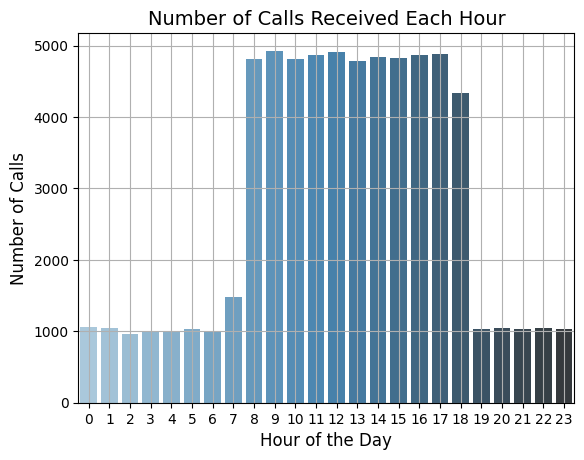

In [ ]:
# Create a barplot for the number of calls per hour using seaborn
sns.barplot(x='hour', y='number_of_calls', data=hourly_call_count, palette='Blues_d')

# Add labels and title
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Calls', fontsize=12)
plt.title('Number of Calls Received Each Hour', fontsize=14)

# Show the plot
plt.xticks(range(0, 24))  # Ensures all 24 hours are labeled
plt.grid(True)
plt.show()

# observatoin
- we obsrve most number of calls are in office hours(8-18) that is very obvious

# yahan tak kr liya hai

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

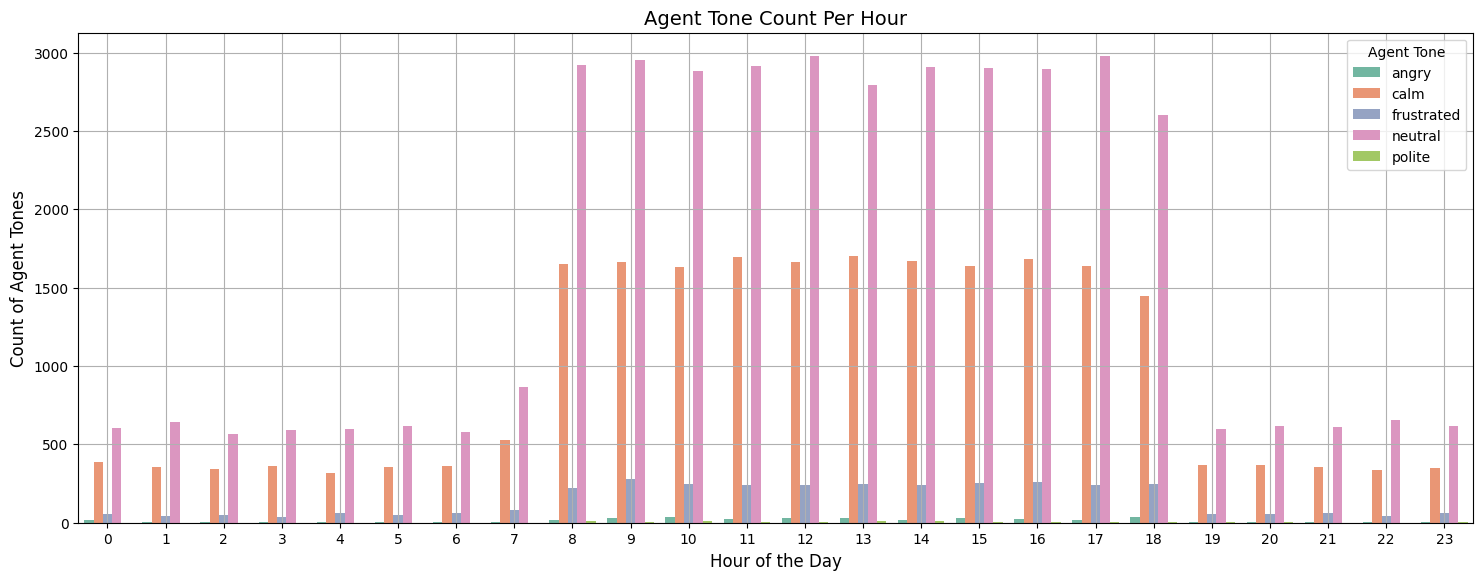

In [ ]:
df['hour'] = df['call_start_datetime'].dt.hour

# Group by hour, agent_tone, and customer_tone and count the occurrences
agent_tone_count = df.groupby(['hour', 'agent_tone']).size().reset_index(name='agent_tone_count')
customer_tone_count = df.groupby(['hour', 'customer_tone']).size().reset_index(name='customer_tone_count')

# Set the figure size for the plots
plt.figure(figsize=(18, 14))

# Create a subplot for Agent Tone
plt.subplot(2, 1, 1)
sns.barplot(x='hour', y='agent_tone_count', hue='agent_tone', data=agent_tone_count, palette='Set2')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Count of Agent Tones', fontsize=12)
plt.title('Agent Tone Count Per Hour', fontsize=14)
plt.xticks(range(0, 24))
plt.legend(title='Agent Tone')
plt.grid(True)

Here are the key insights from this graph:

1. Call Volume Pattern:
- Peak call volumes occur during midday hours (8 AM to 6 PM).
- Call volumes are significantly lower during night and early morning hours.

2. Agent Tone Distribution:
- "Polite" and "calm" tones are the most prevalent.
- "Angry" and "frustrated" tones appear very infrequently.

3. Tone Variation by Time of Day:
- Use of "polite" tone increases during busy hours.
- "Calm" tone becomes more prominent during nighttime hours.

4. Peak Hours:
- The hours from 8 AM to 6 PM appear to be the busiest, aligning with typical work hours.

5. Agent Behavior:
- Agents strive to maintain polite and calm tones most of the time.
- Very little use of angry or frustrated tones, indicating good customer service.

6. Night Shift:
- Night shift has lower call volumes, but agents still maintain primarily calm and polite tones.

7. Training Opportunities:
- "Neutral" tone is used relatively little, which may present an opportunity for training towards more positive or helpful tones.

These insights could be valuable for call center management, agent training, and improving customer service quality.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

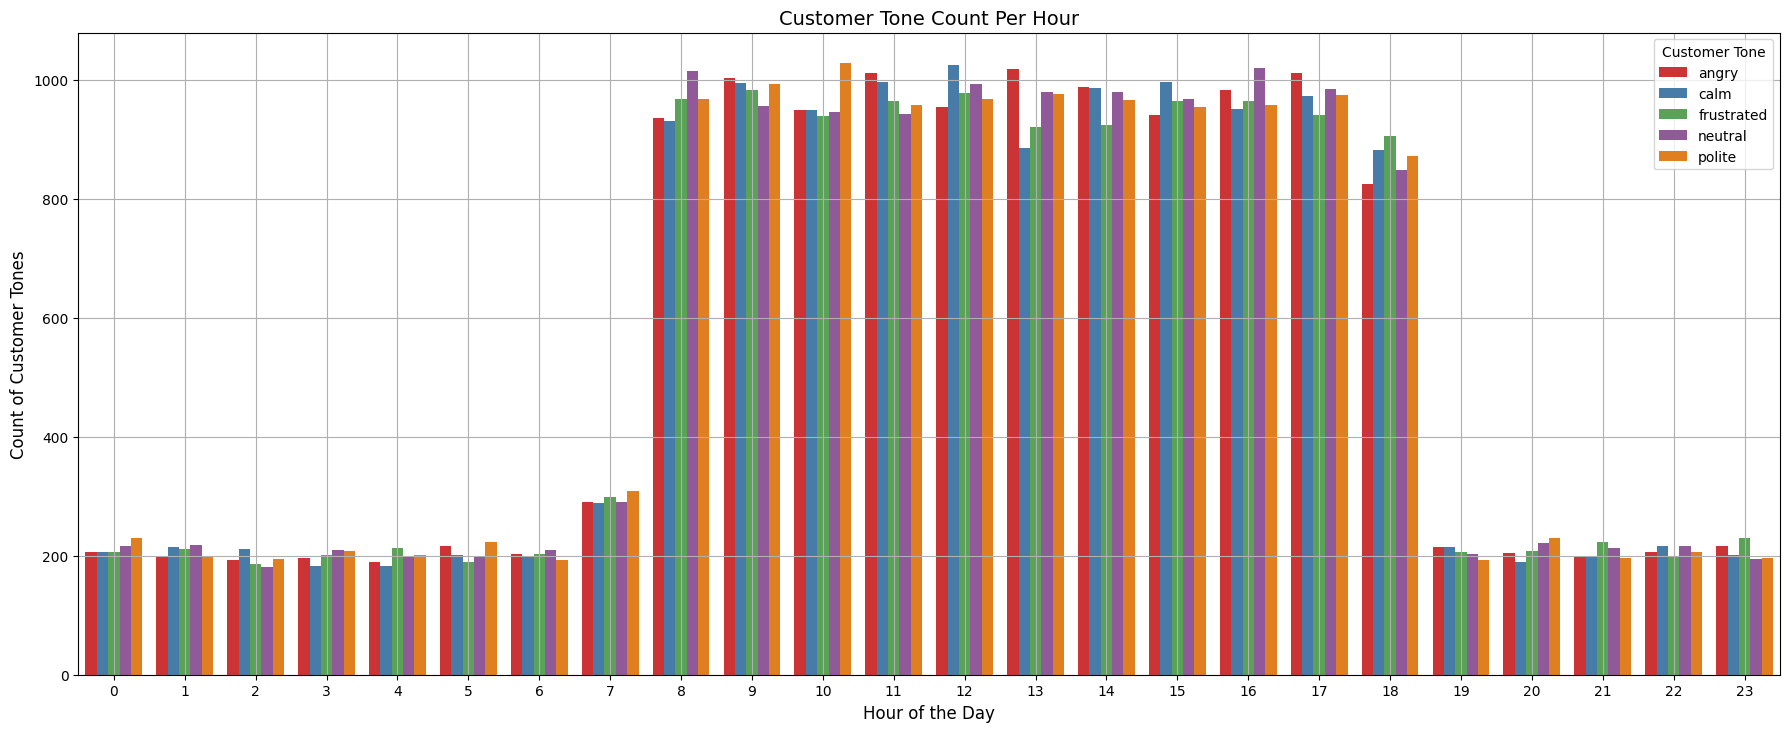

In [ ]:
plt.figure(figsize=(18, 14))
plt.subplot(2, 1, 2)
sns.barplot(x='hour', y='customer_tone_count', hue='customer_tone', data=customer_tone_count, palette='Set1')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Count of Customer Tones', fontsize=12)
plt.title('Customer Tone Count Per Hour', fontsize=14)
plt.xticks(range(0, 24))
plt.legend(title='Customer Tone')
plt.grid(True)

# Adjust layout to avoid overlapping of plots
plt.tight_layout()

# Show the plots
plt.show()

Here are the key insights from this graph of customer tone counts:

1. Call Volume Pattern:
- Peak call volumes occur between 8 AM and 6 PM, aligning with typical business hours.
- Call volumes are significantly lower during night and early morning hours.

2. Customer Tone Distribution:
- All tone types (angry, calm, frustrated, neutral, polite) appear in fairly similar quantities.
- No single tone dominates, indicating a diverse range of customer emotions.

3. Tone Variation by Time of Day:
- All tone types increase during busy hours.
- Tone distribution is more even during nighttime hours.

4. Negative Emotions:
- "Angry" and "frustrated" tones are present in significant amounts, especially during peak hours.
- This points to areas of customer dissatisfaction.

5. Positive Behavior:
- "Polite" and "calm" tones are also prominently featured, showing positive responses from some customers.

6. Neutral Tone:
- There's a substantial use of "neutral" tone, which may indicate uncertainty or indifference from some customers.

7. Time of Day Impact:
- There's a slight increase in negative tones (angry, frustrated) during afternoon and evening hours.

These insights can help in improving customer service strategies, making staffing decisions, and enhancing overall customer satisfaction.

In [ ]:
# Extract the hour from 'call_end_datetime'
df['hour'] = df['call_end_datetime'].dt.hour

# Group by hour and agent_tone to count occurrences
agent_tone_count = df.groupby(['hour', 'agent_tone']).size().reset_index(name='agent_tone_count')

# Group by hour and customer_tone to count occurrences
customer_tone_count = df.groupby(['hour', 'customer_tone']).size().reset_index(name='customer_tone_count')

# Set the figure size for the plots
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

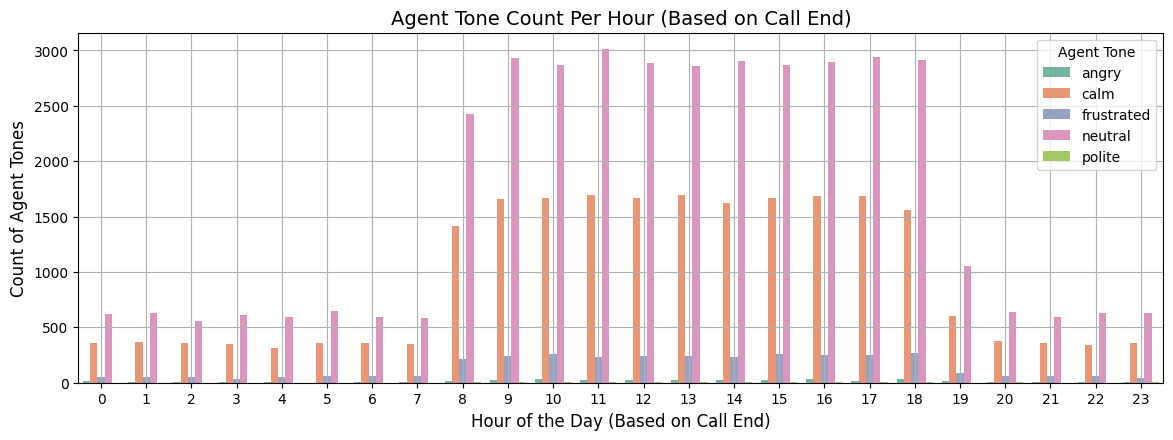

In [ ]:
plt.figure(figsize=(14, 10))

# Create a subplot for Agent Tone
plt.subplot(2, 1, 1)
sns.barplot(x='hour', y='agent_tone_count', hue='agent_tone', data=agent_tone_count, palette='Set2')
plt.xlabel('Hour of the Day (Based on Call End)', fontsize=12)
plt.ylabel('Count of Agent Tones', fontsize=12)
plt.title('Agent Tone Count Per Hour (Based on Call End)', fontsize=14)
plt.xticks(range(0, 24))  # Ensure all 24 hours are labeled
plt.legend(title='Agent Tone')
plt.grid(True)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

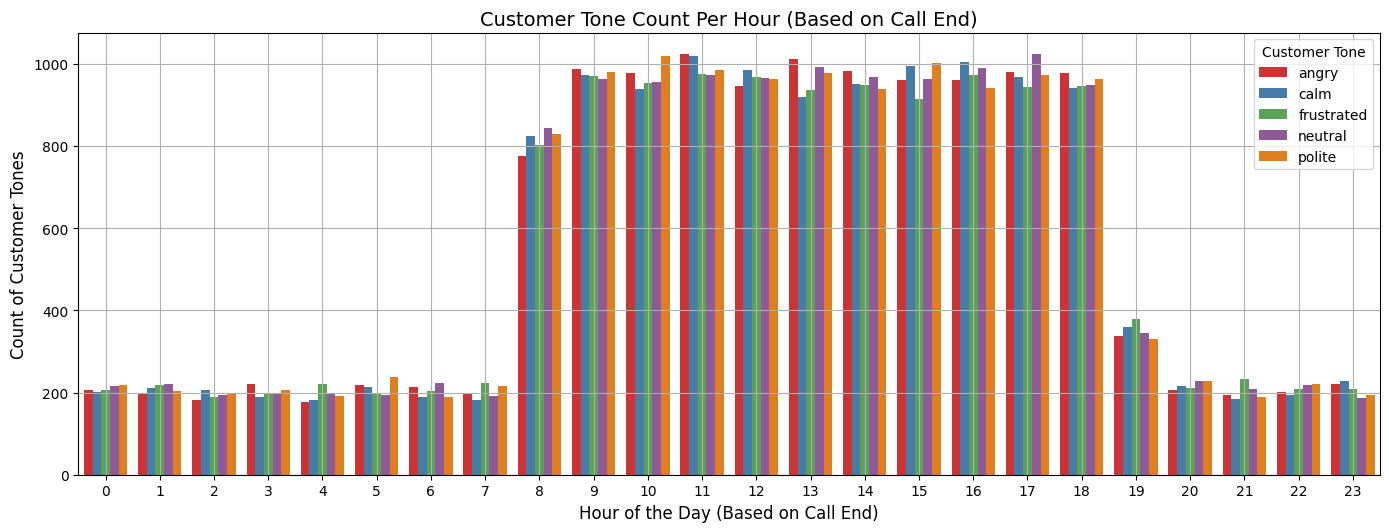

In [ ]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 2)
sns.barplot(x='hour', y='customer_tone_count', hue='customer_tone', data=customer_tone_count, palette='Set1')
plt.xlabel('Hour of the Day (Based on Call End)', fontsize=12)
plt.ylabel('Count of Customer Tones', fontsize=12)
plt.title('Customer Tone Count Per Hour (Based on Call End)', fontsize=14)
plt.xticks(range(0, 24))  # Ensure all 24 hours are labeled
plt.legend(title='Customer Tone')
plt.grid(True)

# Adjust layout to avoid overlapping of plots
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,assigning_time,call_duration,customer_name,elite_level_code,elite_level_code_categorical,primary_call_reason,primary_call_reason_categorical,agent_tone,customer_tone,average_sentiment,silence_percent_average,hour
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,7,31,Matthew Foster,4,4,Voluntary Cancel,Voluntary Cancel,neutral,angry,-0.04,0.39,0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,3,12,Tammy Walters,-1,-1,Booking,Booking,calm,neutral,0.02,0.35,0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,8,19,Jeffery Dixon,-1,-1,IRROPS,IRROPS,neutral,polite,-0.13,0.32,0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,5,7,David Wilkins,2,2,Upgrade,Upgrade,neutral,frustrated,-0.20,0.20,0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,10,9,Elizabeth Daniels,0,0,Seating,Seating,neutral,polite,-0.05,0.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,6,10,Kevin Warner,2,2,Mileage Plus,Mileage Plus,neutral,frustrated,-0.19,0.51,0
66649,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,9,28,Dennis Singleton DDS,-1,-1,Post Flight,Post Flight,calm,calm,0.05,0.34,0
66650,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,3,8,Paul Mitchell,1,1,Upgrade,Upgrade,calm,frustrated,0.03,0.22,0
66651,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,6,6,Kaylee Lang,-1,-1,Upgrade,Upgrade,calm,polite,0.05,0.42,0


In [ ]:
avg_call_duration_table = df.groupby(['primary_call_reason_categorical', 'elite_level_code_categorical'])['call_duration'].mean().reset_index()

# Rename the 'call_duration' column to 'average_call_duration' for clarity
avg_call_duration_table.rename(columns={'call_duration': 'average_call_duration'}, inplace=True)

# Display the resulting table
print(avg_call_duration_table)

    primary_call_reason_categorical  elite_level_code_categorical  \
0                           Baggage                            -1   
1                           Baggage                             0   
2                           Baggage                             1   
3                           Baggage                             2   
4                           Baggage                             3   
..                              ...                           ...   
129                Voluntary Change                             1   
130                Voluntary Change                             2   
131                Voluntary Change                             3   
132                Voluntary Change                             4   
133                Voluntary Change                             5   

     average_call_duration  
0                 5.879004  
1                 5.634648  
2                 5.314376  
3                 5.100000  
4                 5.009901

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

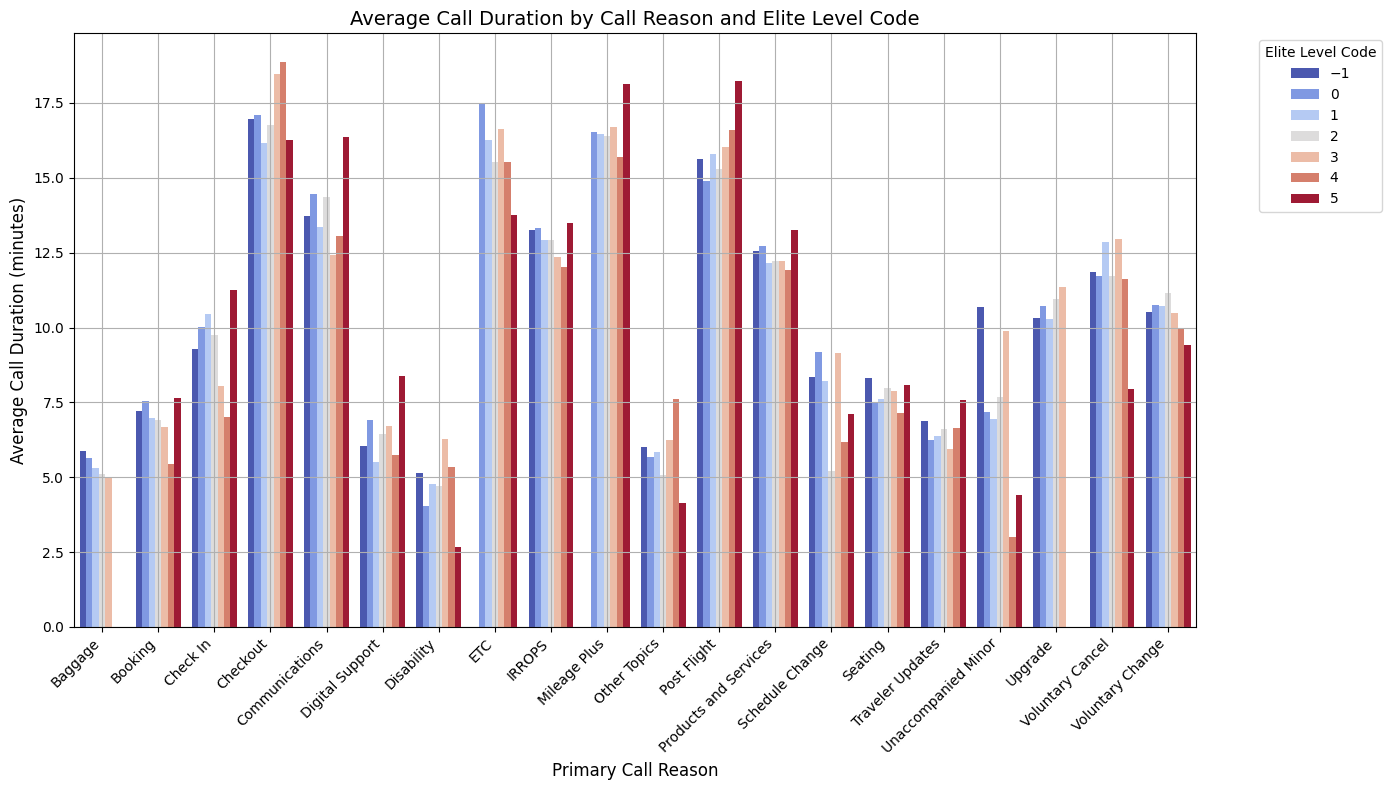

In [ ]:
plt.figure(figsize=(14, 8))

# Create a bar plot
sns.barplot(
    x='primary_call_reason_categorical',
    y='average_call_duration',
    hue='elite_level_code_categorical',
    data=avg_call_duration_table,
    palette='coolwarm'
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Primary Call Reason', fontsize=12)
plt.ylabel('Average Call Duration (minutes)', fontsize=12)
plt.title('Average Call Duration by Call Reason and Elite Level Code', fontsize=14)

# Show the legend outside the plot
plt.legend(title='Elite Level Code', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid for easier readability
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

Here are key insights from the graph showing average call duration by call reason and elite level code:

1. Call Duration Variation:
- Call durations vary significantly across different reasons and elite levels.
- Some call reasons consistently have longer durations (e.g., "Products and Services", "Post Flight") while others are shorter (e.g., "Baggage", "Disability").

2. Elite Level Impact:
- Generally, higher elite levels (4 and 5) tend to have longer call durations for most reasons.
- This suggests that elite customers may receive more detailed or personalized service.

3. Longest Call Types:
- "Products and Services" and "Post Flight" issues typically have the longest call durations across all elite levels.
- This indicates these are complex issues requiring more time to resolve.

4. Shortest Call Types:
- "Baggage" and "Digital Support" tend to have shorter durations, possibly due to more straightforward resolution processes.

5. Elite Level Consistency:
- Some call reasons (e.g., "ETC", "IRROPS") show relatively consistent durations across elite levels.
- This might indicate standardized processes regardless of customer status for these issues.

6. Outliers:
- There are some notable outliers, like very long durations for elite level 5 in "Digital Support" and "Communications".
- These could represent complex cases or may warrant investigation for process improvement.

7. Non-Elite vs Elite:
- Non-elite customers (-1 and 0 levels) often have shorter call durations compared to elite levels.
- This could indicate different service standards or less complex issues for non-elite customers.

8. Mid-Range Elite Levels:
- Elite levels 1-3 often show similar patterns, with call durations falling between non-elite and top-tier elite customers.

9. Voluntary Changes:
- "Voluntary Cancel" and "Voluntary Change" show interesting patterns with varying durations across elite levels, suggesting different handling procedures or complexities based on customer status.

10. Potential Areas for Improvement:
- Categories with consistently long call durations across all levels (e.g., "Communications", "Mileage Plus") might benefit from process optimization or additional staff training.

These insights can be valuable for resource allocation, staff training, and improving customer service efficiency while maintaining appropriate service levels for different customer tiers.

In [ ]:
df['call_duration'].nunique()

119

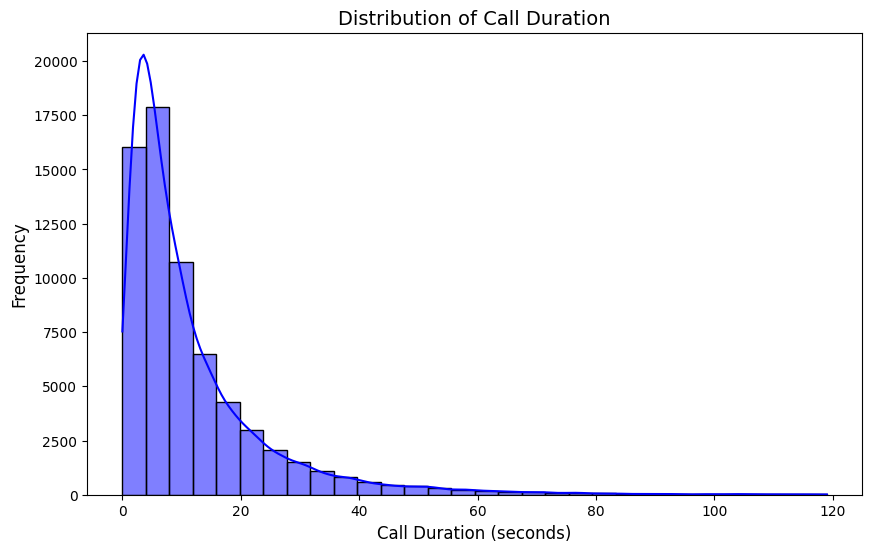

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histplot for call_duration
sns.histplot(df['call_duration'], bins=30, kde=True, color='blue')

# Add labels and title
plt.xlabel('Call Duration (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Call Duration', fontsize=14)

# Display the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

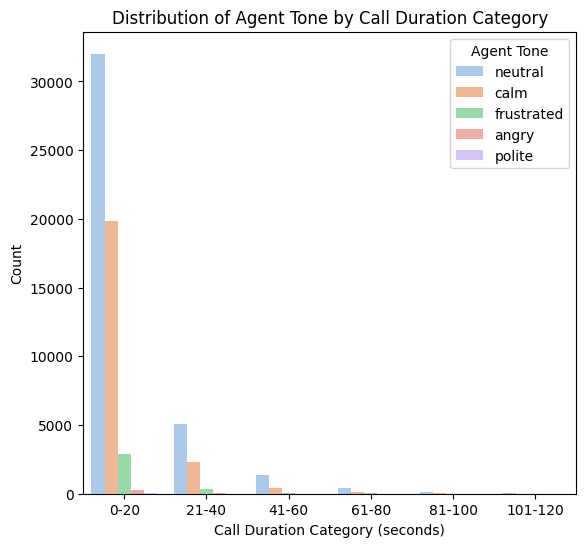

In [ ]:
bins = [0, 20, 40, 60, 80, 100, 120]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '101-120']

# Assign categories to call duration
df['duration_category'] = pd.cut(df['call_duration'], bins=bins, labels=labels, right=True)

# Set up the figure for subplots
plt.figure(figsize=(14, 6))

# Plotting the distribution of Agent Tone by Call Duration Category
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='duration_category', hue='agent_tone', palette='pastel')
plt.title('Distribution of Agent Tone by Call Duration Category')
plt.xlabel('Call Duration Category (seconds)')
plt.ylabel('Count')
plt.legend(title='Agent Tone')

Here are the key insights from the graph showing the distribution of agent tone by call duration category:

1. Short Call Dominance:
   - The vast majority of calls fall into the 0-20 seconds category, suggesting many interactions are brief.

2. Tone Distribution in Short Calls:
   - For 0-20 second calls, "neutral" tone is most common, followed by "calm" and then "frustrated".
   - This indicates that brief interactions are generally handled professionally, but there's a notable presence of frustration.

3. Decreasing Call Frequency with Duration:
   - The number of calls decreases significantly as the duration increases, with very few calls lasting beyond 60 seconds.

4. Neutral Tone Prevalence:
   - "Neutral" tone is the most common across all duration categories, suggesting agents maintain a professional demeanor regardless of call length.

5. Calm Tone:
   - "Calm" is the second most frequent tone, particularly in shorter calls, indicating good emotional control by agents.

6. Frustrated Tone:
   - There's a noticeable presence of "frustrated" tone in short calls, which might warrant further investigation.

7. Angry and Polite Tones:
   - "Angry" and "polite" tones are relatively rare, with minimal representation across all duration categories.

8. Longer Calls:
   - For calls lasting over 40 seconds, the diversity of tones decreases, with mainly neutral tones observed.

9. Absence of Extreme Emotions in Longer Calls:
   - Longer calls (over 60 seconds) show almost exclusively neutral tones, suggesting that extended interactions are handled professionally.

10. Training Opportunities:
    - The presence of frustrated tones in short calls might indicate a need for training in quick, positive resolutions.

11. Efficiency vs. Emotional Management:
    - The high number of short, neutral calls suggests efficient handling, but there might be a trade-off with personalized, emotionally engaging service.

These insights can be valuable for improving agent training, understanding the nature of customer interactions, and potentially identifying areas for improving customer service quality and efficiency.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

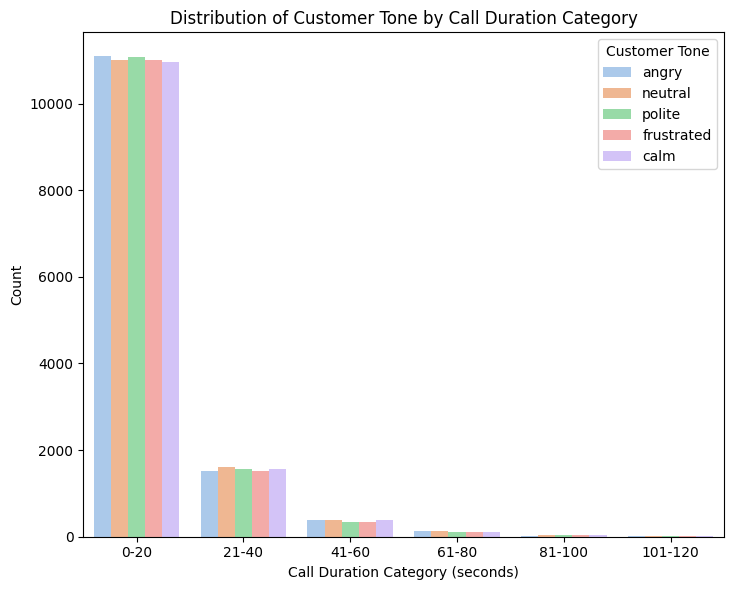

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='duration_category', hue='customer_tone', palette='pastel')
plt.title('Distribution of Customer Tone by Call Duration Category')
plt.xlabel('Call Duration Category (seconds)')
plt.ylabel('Count')
plt.legend(title='Customer Tone')

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

Here are key insights from the graph showing the distribution of customer tone by call duration category:

1. Short Call Dominance:
   - The vast majority of calls fall into the 0-20 seconds category, indicating that most customer interactions are brief.

2. Even Tone Distribution in Short Calls:
   - For 0-20 second calls, all customer tones (angry, neutral, polite, frustrated, calm) are almost equally represented.
   - This suggests a wide range of customer emotions even in brief interactions.

3. Decreasing Call Frequency with Duration:
   - The number of calls decreases significantly as the duration increases, with very few calls lasting beyond 60 seconds.

4. Consistent Tone Distribution:
   - Across all duration categories, the distribution of customer tones remains relatively consistent.
   - This suggests that call duration doesn't strongly correlate with specific customer emotions.

5. Presence of Negative Emotions:
   - "Angry" and "frustrated" tones are present in similar proportions to positive tones, indicating a significant number of dissatisfied customers.

6. Positive Customer Interactions:
   - "Polite" and "calm" tones are well-represented, showing that many customers maintain positive attitudes during calls.

7. Neutral Tone:
   - "Neutral" tone is consistently present across all duration categories, suggesting that many customers remain emotionally neutral during their interactions.

8. Longer Calls:
   - For calls lasting over 40 seconds, the overall number decreases, but the proportion of tones remains similar to shorter calls.

9. Minimal Extended Interactions:
   - Very few calls last beyond 80 seconds, suggesting that most issues are resolved relatively quickly.

10. Customer Emotion Complexity:
    - The even distribution of tones indicates that customer emotions are complex and varied, regardless of call duration.

11. Service Quality Implications:
    - The consistent presence of negative tones (angry, frustrated) across all durations suggests ongoing challenges in customer satisfaction that aren't necessarily resolved by longer interactions.

These insights can be valuable for understanding customer behavior, improving agent training to handle various emotional states, and identifying areas for enhancing overall customer experience and satisfaction.